In [12]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import sys

PROJECT_DIR = "/content/drive/MyDrive/AI_Lotto_Predictor"
sys.path.append(PROJECT_DIR)

print("프로젝트 경로 추가 완료:", PROJECT_DIR)


프로젝트 경로 추가 완료: /content/drive/MyDrive/AI_Lotto_Predictor


In [14]:
from data_loader import load_lottery_data

df, num_range, num_main, num_bonus = load_lottery_data("kr_lotto")

print(df.head())
print("행 개수:", len(df))
print("num_range:", num_range, " num_main:", num_main, " num_bonus:", num_bonus)


   round       date  n1  n2  n3  n4  n5  n6  bonus
0      1 2002-12-07  10  23  29  33  37  40     16
1      2 2002-12-14   9  13  21  25  32  42      2
2      3 2002-12-21  11  16  19  21  27  31     30
3      4 2002-12-28  14  27  30  31  40  42      2
4      5 2003-01-04  16  24  29  40  41  42      3
행 개수: 1201
num_range: 45  num_main: 6  num_bonus: 1


In [16]:
import importlib, analysis
importlib.reload(analysis)

<module 'analysis' from '/content/drive/MyDrive/AI_Lotto_Predictor/analysis.py'>

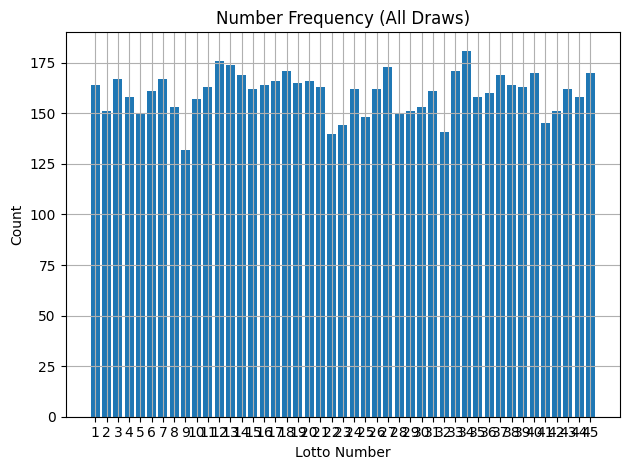

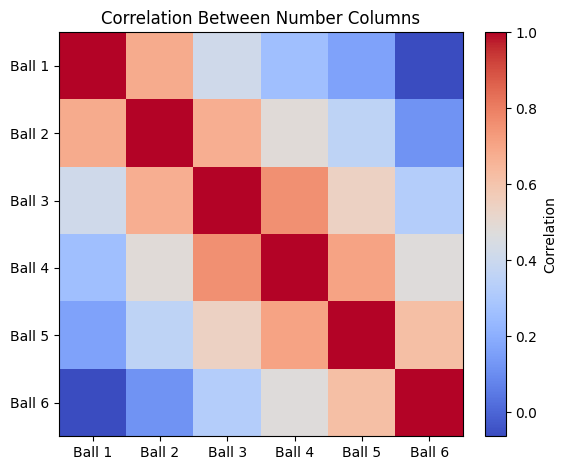

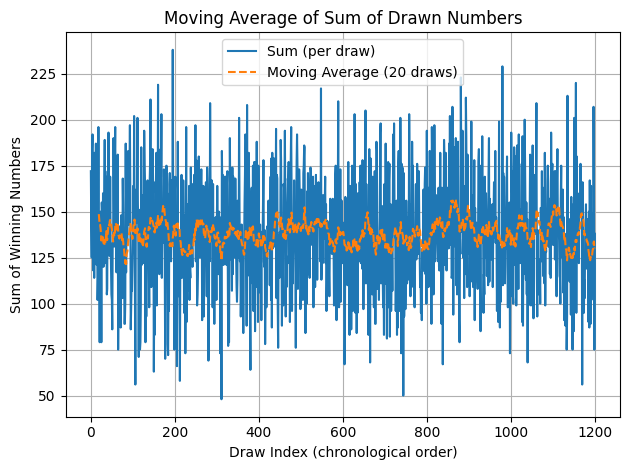

In [17]:
from analysis import plot_histogram, plot_correlation_matrix, plot_moving_sum

# 번호 출현 빈도
plot_histogram(df, num_range=num_range)

# 번호간 상관관계
plot_correlation_matrix(df)

# 회차별 번호 합의 이동 평균
plot_moving_sum(df, window=20)


In [27]:
from importlib import reload
import backtest_visualizer
reload(backtest_visualizer)


<module 'backtest_visualizer' from '/content/drive/MyDrive/AI_Lotto_Predictor/backtest_visualizer.py'>

In [28]:
from backtest_visualizer import backtest_classical, plot_results


In [29]:
from predictor import (
    frequency_based,
    pattern_based,
    math_based,
    hot_cold_hybrid,
    generate_predictions,
)
from backtest_visualizer import backtest_classical, plot_results

# 사용할 전략 묶기
strategies = {
    "frequency": frequency_based,
    "pattern": pattern_based,
    "math": math_based,
    "hot_cold": hot_cold_hybrid,
}

print("=== 전통 전략 한 번 예측 ===")
results = generate_predictions(df, strategies, num_range=num_range, num_select=num_main)
for name, pred in results.items():
    print(f"{name:10s} -> {pred}")

# 롤링 백테스트
hits_list = []
labels = []

for name, func in strategies.items():
    mean_hits, hits = backtest_classical(
        df,
        func,
        lookback=100,          # 최근 100회 빼고 그 전까지를 학습에 사용
        num_range=num_range,
        num_select=num_main,
    )
    #print(f"[{name}] 평균 적중 개수 = {mean_hits:.3f}")
    print(f"[{name}] Average Number of Hits = {mean_hits:.3f}")

    hits_list.append(hits)
    labels.append(name)

#plot_results(hits_list, labels, title="전통 전략 Hit 수 비교")
plot_results(hits_list, labels, title="Traditional Strategy Hit Count Comparison")


=== 전통 전략 한 번 예측 ===
frequency  -> [ 3  7  9 24 27 37]
pattern    -> [[4, 19, 20, 28, 32, 39], [2, 7, 23, 31, 32, 42], [4, 9, 16, 21, 36, 37], [8, 10, 20, 24, 29, 41], [1, 6, 9, 35, 36, 43], [12, 20, 23, 24, 26, 33], [4, 20, 25, 27, 37, 41], [2, 11, 17, 36, 37, 41], [10, 13, 16, 28, 30, 45], [7, 13, 21, 23, 24, 36], [1, 12, 16, 18, 37, 45], [5, 6, 13, 28, 29, 45], [14, 16, 21, 22, 36, 37], [4, 12, 17, 31, 33, 36], [6, 13, 22, 23, 30, 39], [1, 8, 18, 27, 30, 42], [10, 15, 19, 23, 28, 34], [7, 8, 13, 26, 37, 38], [2, 8, 11, 21, 39, 45], [3, 5, 17, 30, 38, 39], [15, 16, 20, 21, 32, 44], [9, 21, 25, 28, 34, 36], [1, 6, 21, 24, 25, 45], [7, 11, 21, 22, 27, 32], [5, 18, 24, 31, 33, 37], [2, 5, 30, 32, 35, 45], [1, 9, 13, 30, 33, 40], [4, 7, 19, 34, 35, 36], [8, 9, 19, 20, 31, 37], [12, 20, 24, 25, 35, 40], [2, 13, 18, 22, 37, 45], [23, 24, 25, 27, 29, 30], [10, 13, 17, 22, 23, 37], [3, 4, 13, 26, 34, 41], [1, 3, 20, 31, 38, 45], [7, 9, 14, 20, 39, 41], [3, 17, 26, 31, 32, 34], [5, 15, 17, 24

[hot_cold] Average Number of Hits = 0.787


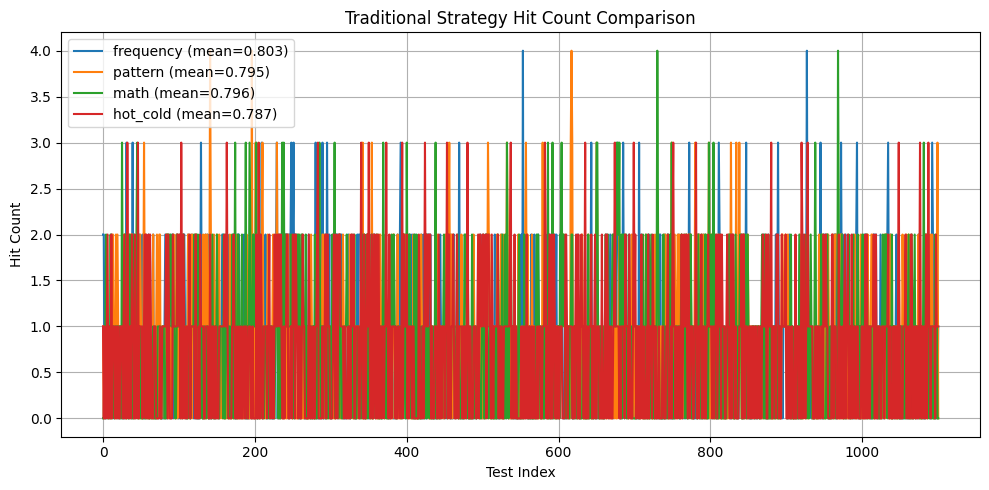

In [43]:
print(f"[{name}] Average Number of Hits = {mean_hits:.3f}")

plot_results(
    hits_list,
    labels,
    title="Traditional Strategy Hit Count Comparison"
)

def plot_results(hits_list, labels, title="Results"):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 4))
    for hits, label in zip(hits_list, labels):
        plt.plot(range(len(hits)), hits, marker='o', linewidth=1, markersize=3, label=label)

    plt.title(title)
    plt.xlabel("Backtest Draw Index (Chronological)")
    plt.ylabel("Number of Hits (out of 6)")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [36]:
from data_loader import create_supervised_data
from config import WINDOW, TRAIN_RATIO, DEFAULT_MODEL

X, y = create_supervised_data(df, window=WINDOW, flatten=False)

N = len(X)
split = int(N * TRAIN_RATIO)

X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("DEFAULT_MODEL:", DEFAULT_MODEL)


X_train: (944, 20, 6)
y_train: (944, 6)
X_val: (237, 20, 6)
y_val: (237, 6)
DEFAULT_MODEL: transformer


In [37]:
from deep_learning_model import build_dnn, build_lstm, build_transformer, train_model

if DEFAULT_MODEL == "dnn":
    # DNN은 입력을 펼친(flatten) 버전 사용
    from data_loader import create_supervised_data as create_data_flat
    X_flat, y_flat = create_data_flat(df, window=WINDOW, flatten=True)
    Nf = len(X_flat)
    split_f = int(Nf * TRAIN_RATIO)

    X_train, X_val = X_flat[:split_f], X_flat[split_f:]
    y_train, y_val = y_flat[:split_f], y_flat[split_f:]
    model = build_dnn(input_shape=(X_train.shape[1],))

elif DEFAULT_MODEL == "lstm":
    model = build_lstm(input_shape=X_train.shape[1:])

elif DEFAULT_MODEL == "transformer":
    model = build_transformer(input_shape=X_train.shape[1:])

else:
    raise ValueError(f"Unknown model type: {DEFAULT_MODEL}")

model.summary()

history = train_model(
    model,
    X_train,
    y_train,
    X_val=X_val,
    y_val=y_val,
    model_name=f"kr_lotto_{DEFAULT_MODEL}",
)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 20, 6)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 6)     │         12 │ input_layer_2[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 20, 6)     │        654 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 20, 6)     │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 20, 6)     │         12 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 20, 128)   │        896 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 20, 128)   │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 20, 6)     │        774 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 6)         │          0 │ dense_7[0][0]     │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 6)         │         42 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,390 (9.34 KB)

 Trainable params: 2,390 (9.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 684.5958 - mae: 22.7328 - val_loss: 650.5071 - val_mae: 22.1095
Epoch 2/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 646.3895 - mae: 21.7852 - val_loss: 550.5643 - val_mae: 19.8508
Epoch 3/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 503.3226 - mae: 18.5554 - val_loss: 347.4295 - val_mae: 14.7305
Epoch 4/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 295.6968 - mae: 13.2246 - val_loss: 168.4830 - val_mae: 9.9028
Epoch 5/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 130.3879 - mae: 8.9060 - val_loss: 92.0419 - val_mae: 7.6684
Epoch 6/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.8888 - mae: 6.5054 - val_loss: 75.2611 - val_mae: 6.5725
Epoch 7/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.5591 - mae: 5.4931 - val_loss: 73.9361 - val_mae: 6.4023
Epoch 8/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 42.8137 - mae: 5.2708 - val_loss: 73.9717 - val_mae: 6.3941
Epoch 9/80
30/30 ━━━━━━━━━━━━━━━

In [41]:
import importlib
import backtest_visualizer
importlib.reload(backtest_visualizer)

from backtest_visualizer import backtest_deep, plot_results


[transformer] Deep Learning Model Average Hit Count = 0.878


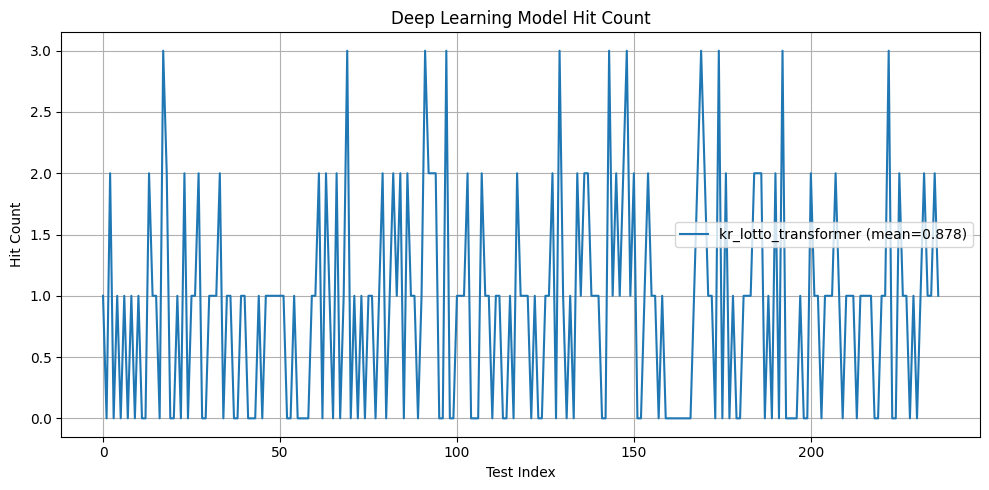

In [42]:
from backtest_visualizer import backtest_deep, plot_results

mean_hits_deep, hits_deep = backtest_deep(
    model,
    X_val,
    y_val,
    num_range=num_range,
    num_select=num_main,
)

#print(f"[{DEFAULT_MODEL}] 딥러닝 모델 평균 Hit 수 = {mean_hits_deep:.3f}")
print(f"[{DEFAULT_MODEL}] Deep Learning Model Average Hit Count = {mean_hits_deep:.3f}")

#plot_results([hits_deep], [f"kr_lotto_{DEFAULT_MODEL}"], title="딥러닝 모델 Hit 수")
plot_results([hits_deep], [f"kr_lotto_{DEFAULT_MODEL}"], title="Deep Learning Model Hit Count")


추가  예제   LSTM 기반 예측

In [44]:
# ===== LSTM-based Lotto Predictor Example (single cell) =====
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# ---------------------------------------
# 0. Basic settings
# ---------------------------------------
NUM_RANGE = 45      # numbers 1 ~ 45
NUM_MAIN = 6        # main balls
SEQ_LEN = 20        # how many past draws to use as input
BATCH_SIZE = 32
EPOCHS = 20
LR = 1e-3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ---------------------------------------
# 1. Prepare DataFrame & columns
#    Assumes df already exists in main.ipynb
# ---------------------------------------
df_lotto = df.copy()

# If there is 회차 column, sort by it (oldest -> newest)
if "회차" in df_lotto.columns:
    df_lotto = df_lotto.sort_values("회차")
else:
    df_lotto = df_lotto.sort_index()

# main number columns (n1 ~ n6)
main_cols = [f"n{i}" for i in range(1, NUM_MAIN + 1)]
for c in main_cols:
    if c not in df_lotto.columns:
        raise ValueError(f"Required column '{c}' not found in df. Available: {df_lotto.columns.tolist()}")

draws = df_lotto[main_cols].values.astype(int)  # shape: (N, NUM_MAIN)
N = len(draws)
print(f"Loaded {N} draws.")


# ---------------------------------------
# 2. Convert draws to multi-hot vectors
#    Each draw -> 45-dim vector with 1.0 at drawn numbers
# ---------------------------------------
def draws_to_multihot(draw_array, num_range=NUM_RANGE):
    """
    draw_array : np.ndarray of shape (N, NUM_MAIN)
    returns    : np.ndarray of shape (N, num_range), float32
    """
    out = np.zeros((len(draw_array), num_range), dtype=np.float32)
    for i, row in enumerate(draw_array):
        for n in row:
            if 1 <= n <= num_range:
                out[i, n-1] = 1.0
    return out

multi_hot = draws_to_multihot(draws)  # (N, 45)
print("Multi-hot shape:", multi_hot.shape)

# ---------------------------------------
# 3. Build sequence dataset: use SEQ_LEN draws to predict next draw
# ---------------------------------------
X_list = []
y_list = []

for i in range(len(multi_hot) - SEQ_LEN):
    X_list.append(multi_hot[i:i+SEQ_LEN])    # (SEQ_LEN, 45)
    y_list.append(multi_hot[i+SEQ_LEN])      # (45,)

X = np.stack(X_list, axis=0)  # (M, SEQ_LEN, 45)
y = np.stack(y_list, axis=0)  # (M, 45)
M = X.shape[0]
print(f"Built sequence dataset: X={X.shape}, y={y.shape}")

# Train / validation split (simple: last 10% as validation)
split_idx = int(M * 0.9)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

print(f"Train size: {len(X_train)}, Val size: {len(X_val)}")


# ---------------------------------------
# 4. Torch Dataset & DataLoader
# ---------------------------------------
class LottoSeqDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).float()

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = LottoSeqDataset(X_train, y_train)
val_ds = LottoSeqDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)


# ---------------------------------------
# 5. LSTM Model (many-to-one, multi-hot output)
# ---------------------------------------
class LottoLSTM(nn.Module):
    def __init__(self, input_dim=NUM_RANGE, hidden_size=128, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
        )
        self.fc = nn.Linear(hidden_size, input_dim)

    def forward(self, x):
        # x: (batch, seq_len, input_dim)
        out, _ = self.lstm(x)          # out: (batch, seq_len, hidden)
        out = out[:, -1, :]           # last time step: (batch, hidden)
        logits = self.fc(out)         # (batch, input_dim)
        return logits                 # use BCEWithLogitsLoss outside


model = LottoLSTM().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

print(model)


# ---------------------------------------
# 6. Training Loop
# ---------------------------------------
def eval_on_loader(model, loader, criterion):
    model.eval()
    total_loss = 0.0
    count = 0
    with torch.no_grad():
        for Xb, yb in loader:
            Xb = Xb.to(device)
            yb = yb.to(device)

            logits = model(Xb)
            loss = criterion(logits, yb)

            batch_size = Xb.size(0)
            total_loss += loss.item() * batch_size
            count += batch_size

    return total_loss / max(count, 1)


for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0.0
    count = 0

    for Xb, yb in train_loader:
        Xb = Xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()
        logits = model(Xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()

        batch_size = Xb.size(0)
        total_loss += loss.item() * batch_size
        count += batch_size

    train_loss = total_loss / max(count, 1)
    val_loss = eval_on_loader(model, val_loader, criterion)

    print(f"[Epoch {epoch:02d}] train_loss={train_loss:.4f}  val_loss={val_loss:.4f}")


# ---------------------------------------
# 7. Predict next draw from the latest SEQ_LEN draws
# ---------------------------------------
model.eval()
with torch.no_grad():
    # last SEQ_LEN draws from full data
    last_seq = multi_hot[-SEQ_LEN:]                      # (SEQ_LEN, 45)
    last_seq_tensor = torch.from_numpy(last_seq).float().unsqueeze(0).to(device)  # (1, SEQ_LEN, 45)

    logits = model(last_seq_tensor)                      # (1, 45)
    probs = torch.sigmoid(logits).cpu().numpy().flatten()  # (45,)

# pick top NUM_MAIN numbers with highest probability
top_indices = probs.argsort()[::-1][:NUM_MAIN]           # descending sort
pred_numbers = (top_indices + 1).tolist()                # 0-based -> 1~45

print("\n=== LSTM predicted numbers (main 6) ===")
print(sorted(pred_numbers))


Using device: cpu
Loaded 1201 draws.
Multi-hot shape: (1201, 45)
Built sequence dataset: X=(1181, 20, 45), y=(1181, 45)
Train size: 1062, Val size: 119
LottoLSTM(
  (lstm): LSTM(45, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=45, bias=True)
)
[Epoch 01] train_loss=0.4793  val_loss=0.3936
[Epoch 02] train_loss=0.3942  val_loss=0.3939
[Epoch 03] train_loss=0.3940  val_loss=0.3936
[Epoch 04] train_loss=0.3941  val_loss=0.3933
[Epoch 05] train_loss=0.3943  val_loss=0.3930
[Epoch 06] train_loss=0.3940  val_loss=0.3944
[Epoch 07] train_loss=0.3940  val_loss=0.3933
[Epoch 08] train_loss=0.3936  val_loss=0.3935
[Epoch 09] train_loss=0.3936  val_loss=0.3938
[Epoch 10] train_loss=0.3938  val_loss=0.3928
[Epoch 11] train_loss=0.3940  val_loss=0.3932
[Epoch 12] train_loss=0.3937  val_loss=0.3931
[Epoch 13] train_loss=0.3937  val_loss=0.3929
[Epoch 14] train_loss=0.3938  val_loss=0.3937
[Epoch 15] train_loss=0.3937  val_loss=0.3941
[Epoch 16] train_loss=0.3938 

추가 예제 파형 + 기울기

사용하는 메인 번호 컬럼: ['n1', 'n2', 'n3', 'n4', 'n5', 'n6']
총 회차 수: 1201

=== 파형(기울기) 기반 예측 결과 ===
예측 번호 6개: [7, 8, 26, 27, 33, 34]


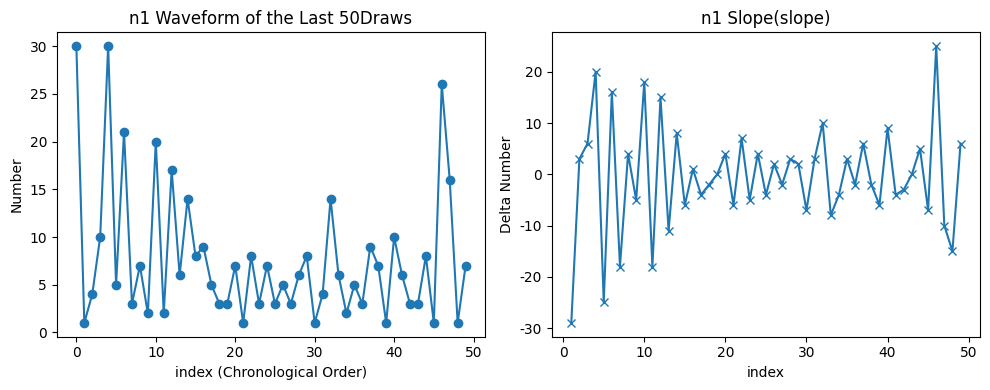


=== 파형 기반 롤링 백테스트 결과 ===
테스트 회차 수: 1151
평균 적중 개수: 0.8105994787141616


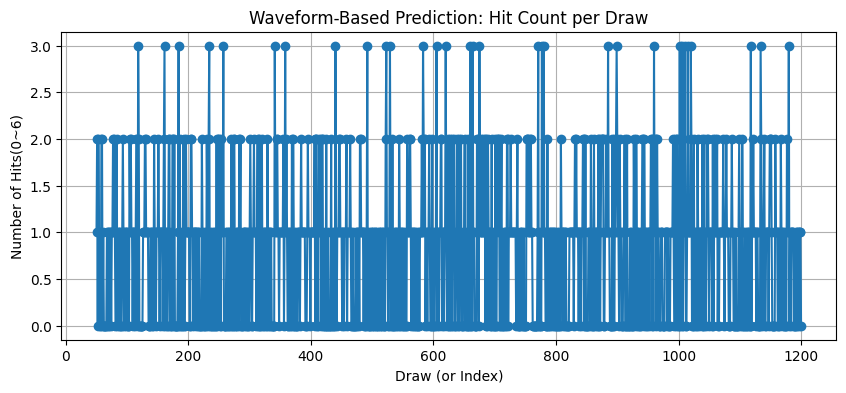

In [48]:
# ===== 파형(기울기) 기반 로또 예측 예제 셀 =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 0. 기본 설정
# --------------------------------------------------
NUM_RANGE = 45      # 1~45
NUM_MAIN = 6        # 메인 번호 개수
LOOKBACK = 50       # 파형 분석에 사용할 최근 회차 수
SLOPE_WINDOW = 5    # 기울기 평균을 낼 때 사용할 최근 기울기 개수

# df는 main.ipynb 상단에서 이미 로드되어 있다고 가정
df_wave = df.copy()

# 회차 기준으로 정렬 (오래된 회차 -> 최신 회차)
if "회차" in df_wave.columns:
    df_wave = df_wave.sort_values("회차")
else:
    df_wave = df_wave.sort_index()

# 메인 번호 컬럼 (필요시 여기만 수정)
main_cols = [f"n{i}" for i in range(1, NUM_MAIN + 1)]
for c in main_cols:
    if c not in df_wave.columns:
        raise ValueError(f"컬럼 '{c}' 를 찾을 수 없습니다. df 컬럼: {df_wave.columns.tolist()}")

print("사용하는 메인 번호 컬럼:", main_cols)
print("총 회차 수:", len(df_wave))


# --------------------------------------------------
# 1. 파형 기반 예측 함수
#    - 각 공 위치별 시계열 파형
#    - 최근 기울기(slope) 평균으로 다음 값을 예측
# --------------------------------------------------
def wave_based_predict_next(
    df_in,
    main_cols,
    lookback=LOOKBACK,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    slope_window=SLOPE_WINDOW,
):
    """
    df_in     : 회차 정렬이 완료된 DataFrame
    main_cols : 메인 번호 컬럼 리스트 (예: ['n1',...'n6'])
    lookback  : 파형 분석에 사용할 최근 회차 수
    slope_window : 기울기 평균을 낼 때 사용할 최근 구간 수
    """
    df_local = df_in.copy()

    # 최근 lookback 개만 사용 (데이터 부족하면 전체 사용)
    if len(df_local) < lookback:
        lookback = len(df_local)
    df_recent = df_local.iloc[-lookback:]

    pred_numbers = []
    debug_info = []  # 디버깅용 정보 (각 위치별 파형/기울기 등)

    for pos, col in enumerate(main_cols, start=1):
        series = df_recent[col].astype(int).values  # shape: (lookback,)

        # 기울기(slope) = 현재 - 이전
        if len(series) < 2:
            # 데이터가 너무 적으면 그냥 마지막 값 사용
            last_val = int(series[-1])
            pred_val = last_val
            slopes = []
        else:
            slopes = np.diff(series)  # (lookback-1,)
            # 최근 slope_window 개만 사용 (부족하면 전체)
            sw = min(slope_window, len(slopes))
            mean_slope = float(np.mean(slopes[-sw:]))
            last_val = float(series[-1])
            pred_val = last_val + mean_slope

        # 반올림 + 범위 클램프 (1~num_range)
        pred_val_round = int(np.rint(pred_val))
        pred_val_round = max(1, min(num_range, pred_val_round))

        pred_numbers.append(pred_val_round)
        debug_info.append({
            "position": pos,
            "col": col,
            "series": series,
            "slopes": slopes,
            "pred_raw": pred_val,
            "pred_clamped": pred_val_round,
        })

    # 중복 제거: 중복이 있으면 아직 안 나온 숫자 중에서 근접한 값 채우기
    unique_nums = []
    used = set()
    for n in pred_numbers:
        if n not in used:
            unique_nums.append(n)
            used.add(n)
        else:
            # 겹치면 주변 숫자 중 비어 있는 숫자를 찾는다
            found = False
            for offset in range(1, num_range):
                for candidate in (n - offset, n + offset):
                    if 1 <= candidate <= num_range and candidate not in used:
                        unique_nums.append(candidate)
                        used.add(candidate)
                        found = True
                        break
                if found:
                    break
            if not found:
                # 어쩔 수 없이 아무거나 (이론상 거의 안 옴)
                for candidate in range(1, num_range + 1):
                    if candidate not in used:
                        unique_nums.append(candidate)
                        used.add(candidate)
                        break

    # 최종 6개만 사용 (정렬해서 보기 좋게)
    final_pred = sorted(unique_nums[:num_select])
    return final_pred, debug_info


# --------------------------------------------------
# 2. 다음 회차 예측 실행
# --------------------------------------------------
wave_pred, debug_info = wave_based_predict_next(
    df_wave,
    main_cols=main_cols,
    lookback=LOOKBACK,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    slope_window=SLOPE_WINDOW,
)

print("\n=== 파형(기울기) 기반 예측 결과 ===")
print("예측 번호 6개:", wave_pred)

# --------------------------------------------------
# 3. 마지막 한 위치에 대한 파형/기울기 그래프 예시
#    (1구(n1)에 대해 최근 파형과 기울기를 시각화)
# --------------------------------------------------
pos_example = 1
col_example = main_cols[pos_example - 1]

df_recent = df_wave.iloc[-LOOKBACK:]
series_ex = df_recent[col_example].astype(int).values
slopes_ex = np.diff(series_ex) if len(series_ex) > 1 else np.array([])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(series_ex)), series_ex, marker="o")
plt.title(f"{col_example} Waveform of the Last {LOOKBACK}Draws")
plt.xlabel("index (Chronological Order)")
plt.ylabel("Number")

plt.subplot(1, 2, 2)
if len(slopes_ex) > 0:
    plt.plot(range(1, len(series_ex)), slopes_ex, marker="x")
    plt.title(f"{col_example} Slope(slope)")
    plt.xlabel("index")
    plt.ylabel("Delta Number")
else:
    plt.text(0.5, 0.5, "Insufficient Data", ha="center", va="center")
    plt.title("Slope(slope)")

plt.tight_layout()
plt.show()


# --------------------------------------------------
# 4. 간단 롤링 백테스트
#    - 각 회차 예측 → 실제 당첨과 몇 개 일치하는지 확인
# --------------------------------------------------
def simple_wave_backtest(
    df_in,
    main_cols,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    lookback=LOOKBACK,
    slope_window=SLOPE_WINDOW,
):
    df_local = df_in.copy()
    if "회차" in df_local.columns:
        df_local = df_local.sort_values("회차")
    else:
        df_local = df_local.sort_index()

    hits = []
    rounds = []

    # lookback 지점 이후부터 한 회차씩 예측
    for idx in range(lookback, len(df_local)):
        df_train = df_local.iloc[:idx]   # idx 이전까지로 학습/파형 분석
        pred, _ = wave_based_predict_next(
            df_train,
            main_cols=main_cols,
            lookback=lookback,
            num_range=num_range,
            num_select=num_select,
            slope_window=slope_window,
        )

        row_actual = df_local.iloc[idx]
        actual_nums = [int(row_actual[c]) for c in main_cols]

        hit_count = len(set(pred) & set(actual_nums))
        hits.append(hit_count)

        if "회차" in df_local.columns:
            rounds.append(int(row_actual["회차"]))
        else:
            rounds.append(idx)

    return rounds, hits

rounds, hits = simple_wave_backtest(
    df_wave,
    main_cols=main_cols,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    lookback=LOOKBACK,
    slope_window=SLOPE_WINDOW,
)

if hits:
    print("\n=== 파형 기반 롤링 백테스트 결과 ===")
    print("테스트 회차 수:", len(hits))
    print("평균 적중 개수:", np.mean(hits))

    plt.figure(figsize=(10, 4))
    plt.plot(rounds, hits, marker="o")
    plt.title("Waveform-Based Prediction: Hit Count per Draw")
    plt.xlabel("Draw (or Index)")
    plt.ylabel("Number of Hits(0~6)")
    plt.grid(True)
    plt.show()
else:
    print("\n백테스트를 수행하기에 데이터가 충분하지 않습니다.")


미분기반 예측 예제

사용하는 메인 번호 컬럼: ['n1', 'n2', 'n3', 'n4', 'n5', 'n6']
총 회차 수: 1201

=== 미분(1차+2차 차분) 기반 예측 결과 ===
예측 번호 6개: [13, 18, 39, 41, 44, 45]


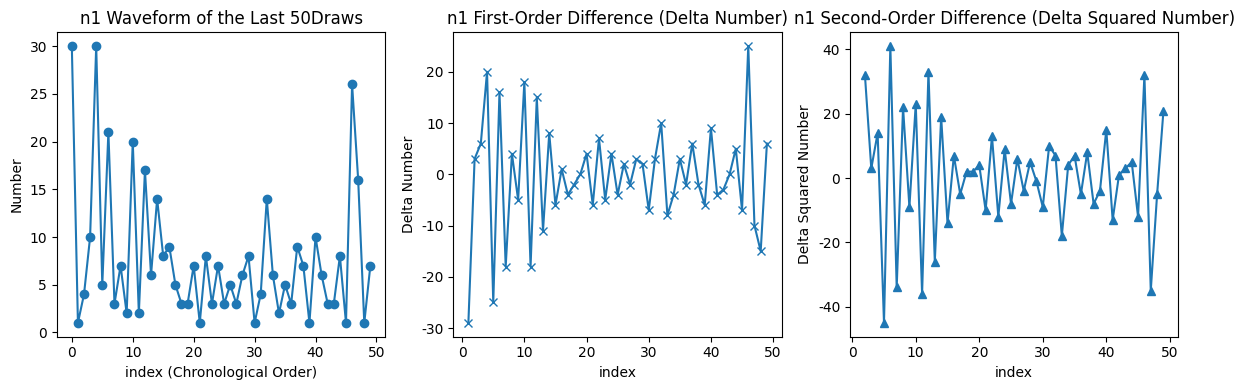


=== 미분 기반 롤링 백테스트 결과 ===
테스트 회차 수: 1151
평균 적중 개수: 0.7845351867940921


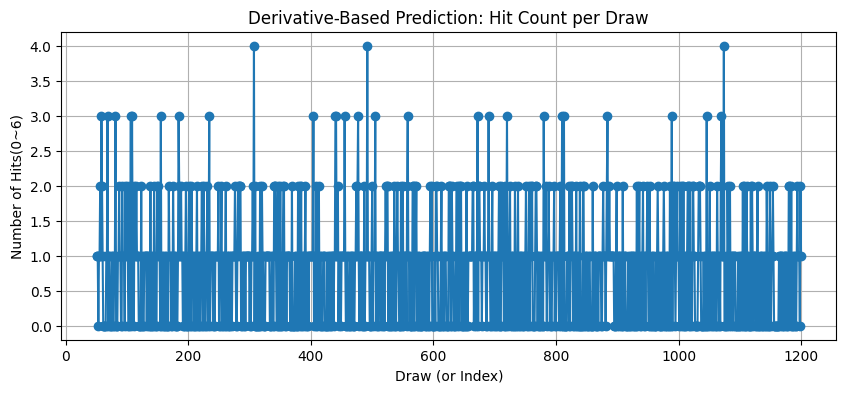

In [49]:
# ===== 미분(1차+2차 차분) 기반 로또 예측 예제 셀 =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 0. 기본 설정 (이미 위에서 정의했다면 재정의되어도 무방)
# --------------------------------------------------
NUM_RANGE = 45       # 1~45
NUM_MAIN = 6         # 메인 번호 개수
LOOKBACK = 50        # 최근 LOOKBACK 회차를 학습/분석에 사용
D1_WINDOW = 5        # 1차 미분(차분) 평균을 낼 때 사용할 최근 구간 수
D2_WINDOW = 5        # 2차 미분(차분) 평균을 낼 때 사용할 최근 구간 수

df_deriv = df.copy()

# 회차 기준으로 정렬 (오래된 회차 -> 최신 회차)
if "회차" in df_deriv.columns:
    df_deriv = df_deriv.sort_values("회차")
else:
    df_deriv = df_deriv.sort_index()

# 메인 번호 컬럼 (필요시 여기만 수정)
main_cols = [f"n{i}" for i in range(1, NUM_MAIN + 1)]
for c in main_cols:
    if c not in df_deriv.columns:
        raise ValueError(f"컬럼 '{c}' 를 찾을 수 없습니다. df 컬럼: {df_deriv.columns.tolist()}")

print("사용하는 메인 번호 컬럼:", main_cols)
print("총 회차 수:", len(df_deriv))


# --------------------------------------------------
# 1. 미분(1차+2차 차분) 기반 예측 함수
#    - 각 공 위치별 시계열 x_t
#    - 1차 차분 d1_t = x_t - x_{t-1}
#    - 2차 차분 d2_t = d1_t - d1_{t-1}
#    - 마지막 d1, 최근 d2 평균으로 다음 d1 예측 → 다음 x 예측
# --------------------------------------------------
def derivative_based_predict_next(
    df_in,
    main_cols,
    lookback=LOOKBACK,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    d1_window=D1_WINDOW,
    d2_window=D2_WINDOW,
):
    """
    df_in     : 회차 정렬이 완료된 DataFrame
    main_cols : 메인 번호 컬럼 리스트 (예: ['n1',...'n6'])
    lookback  : 분석에 사용할 최근 회차 수
    d1_window : 1차 차분 평균을 낼 때 사용할 구간 수
    d2_window : 2차 차분 평균을 낼 때 사용할 구간 수
    """
    df_local = df_in.copy()

    # 최근 lookback 개만 사용 (데이터 부족하면 전체 사용)
    if len(df_local) < lookback:
        lookback = len(df_local)
    df_recent = df_local.iloc[-lookback:]

    pred_numbers = []
    debug_info = []

    for pos, col in enumerate(main_cols, start=1):
        series = df_recent[col].astype(int).values  # shape: (lookback,)

        # 데이터가 너무 적을 때 예외처리
        if len(series) < 3:
            # 회차가 매우 적으면: 단순히 마지막 값으로 예측
            last_val = int(series[-1])
            pred_val = last_val
            d1 = np.array([])
            d2 = np.array([])
        else:
            # 1차/2차 차분 계산
            d1 = np.diff(series)          # 길이: lookback-1
            d2 = np.diff(d1) if len(d1) > 1 else np.array([])  # 길이: lookback-2

            # 최근 d1_window 개 1차 차분 평균
            w1 = min(d1_window, len(d1))
            mean_d1 = float(np.mean(d1[-w1:])) if w1 > 0 else 0.0

            # 최근 d2_window 개 2차 차분 평균
            if len(d2) > 0:
                w2 = min(d2_window, len(d2))
                mean_d2 = float(np.mean(d2[-w2:])) if w2 > 0 else 0.0
            else:
                mean_d2 = 0.0

            last_x = float(series[-1])
            last_d1 = float(d1[-1]) if len(d1) > 0 else 0.0

            # 새 1차 차분 예측: d1_next ≈ last_d1 + mean_d2
            d1_next = last_d1 + mean_d2

            # 새 값 예측: x_next ≈ last_x + d1_next
            pred_val = last_x + d1_next

        # 반올림 + 1~num_range 범위 클램프
        pred_val_round = int(np.rint(pred_val))
        pred_val_round = max(1, min(num_range, pred_val_round))

        pred_numbers.append(pred_val_round)
        debug_info.append({
            "position": pos,
            "col": col,
            "series": series,
            "d1": d1,
            "d2": d2,
            "pred_raw": pred_val,
            "pred_clamped": pred_val_round,
        })

    # 중복 제거: 중복이 있으면 아직 안 나온 숫자 중에서 근접한 값 채우기
    unique_nums = []
    used = set()
    for n in pred_numbers:
        if n not in used:
            unique_nums.append(n)
            used.add(n)
        else:
            # 겹치면 주변 숫자 중 비어 있는 숫자를 탐색
            found = False
            for offset in range(1, num_range):
                for candidate in (n - offset, n + offset):
                    if 1 <= candidate <= num_range and candidate not in used:
                        unique_nums.append(candidate)
                        used.add(candidate)
                        found = True
                        break
                if found:
                    break
            if not found:
                # 모든 숫자가 사용된 극단적 상황 → 남는 아무 숫자나
                for candidate in range(1, num_range + 1):
                    if candidate not in used:
                        unique_nums.append(candidate)
                        used.add(candidate)
                        break

    # 최종 num_select개만 사용 (정렬)
    final_pred = sorted(unique_nums[:num_select])
    return final_pred, debug_info


# --------------------------------------------------
# 2. 다음 회차 예측 실행
# --------------------------------------------------
deriv_pred, deriv_debug = derivative_based_predict_next(
    df_deriv,
    main_cols=main_cols,
    lookback=LOOKBACK,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    d1_window=D1_WINDOW,
    d2_window=D2_WINDOW,
)

print("\n=== 미분(1차+2차 차분) 기반 예측 결과 ===")
print("예측 번호 6개:", deriv_pred)


# --------------------------------------------------
# 3. 예시: 1구(n1)에 대한 시계열 + 1차/2차 차분 그래프
# --------------------------------------------------
pos_example = 1
col_example = main_cols[pos_example - 1]

df_recent = df_deriv.iloc[-LOOKBACK:]
series_ex = df_recent[col_example].astype(int).values
d1_ex = np.diff(series_ex) if len(series_ex) > 1 else np.array([])
d2_ex = np.diff(d1_ex) if len(d1_ex) > 1 else np.array([])

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(range(len(series_ex)), series_ex, marker="o")
plt.title(f"{col_example} Waveform of the Last {LOOKBACK}Draws")
plt.xlabel("index (Chronological Order)")
plt.ylabel("Number")

plt.subplot(1, 3, 2)

if len(d1_ex) > 0:
    plt.plot(range(1, len(series_ex)), d1_ex, marker="x")
    #plt.title(f"{col_example} 1차 차분 (Δ번호)")
    #plt.xlabel("index")
    #plt.ylabel("Δ번호")
    plt.title(f"{col_example} First-Order Difference (Delta Number)")
    plt.xlabel("index")
    plt.ylabel("Delta Number")
else:
    plt.text(0.5, 0.5, "Insufficient Data", ha="center", va="center")
    plt.title("First-Order Difference")

plt.subplot(1, 3, 3)
if len(d2_ex) > 0:
    plt.plot(range(2, len(series_ex)), d2_ex, marker="^")
    #plt.title(f"{col_example} 2차 차분 (Δ²번호)")
    #plt.xlabel("index")
    #plt.ylabel("Δ²번호")
    plt.title(f"{col_example} Second-Order Difference (Delta Squared Number)")
    plt.xlabel("index")
    plt.ylabel("Delta Squared Number")
else:
    plt.text(0.5, 0.5, "Insufficient Data", ha="center", va="center")
    plt.title("Second-Order Difference")

plt.tight_layout()
plt.show()


# --------------------------------------------------
# 4. 롤링 백테스트
# --------------------------------------------------
def derivative_backtest(
    df_in,
    main_cols,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    lookback=LOOKBACK,
    d1_window=D1_WINDOW,
    d2_window=D2_WINDOW,
):
    """
    각 회차를 테스트 대상으로 삼아,
    - 그 회차 직전까지의 데이터로 derivative_based_predict_next 실행
    - 실제 당첨번호와 교집합 크기(hit 수)를 기록
    """
    df_local = df_in.copy()
    if "회차" in df_local.columns:
        df_local = df_local.sort_values("회차")
    else:
        df_local = df_local.sort_index()

    hits = []
    rounds = []

    for idx in range(lookback, len(df_local)):
        df_train = df_local.iloc[:idx]  # 이전까지로 학습

        pred, _ = derivative_based_predict_next(
            df_train,
            main_cols=main_cols,
            lookback=lookback,
            num_range=num_range,
            num_select=num_select,
            d1_window=d1_window,
            d2_window=d2_window,
        )

        row_actual = df_local.iloc[idx]
        actual_nums = [int(row_actual[c]) for c in main_cols]

        hit_count = len(set(pred) & set(actual_nums))
        hits.append(hit_count)

        if "회차" in df_local.columns:
            rounds.append(int(row_actual["회차"]))
        else:
            rounds.append(idx)

    return rounds, hits

rounds_d, hits_d = derivative_backtest(
    df_deriv,
    main_cols=main_cols,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    lookback=LOOKBACK,
    d1_window=D1_WINDOW,
    d2_window=D2_WINDOW,
)

if hits_d:
    print("\n=== 미분 기반 롤링 백테스트 결과 ===")
    print("테스트 회차 수:", len(hits_d))
    print("평균 적중 개수:", np.mean(hits_d))

    plt.figure(figsize=(10, 4))
    plt.plot(rounds_d, hits_d, marker="o")
    plt.title("Derivative-Based Prediction: Hit Count per Draw")
    plt.xlabel("Draw (or Index)")
    plt.ylabel("Number of Hits(0~6)")
    #plt.title("미분 기반 예측: 회차별 Hit 개수")
    #plt.xlabel("회차(또는 index)")
    #plt.ylabel("(0~6)")
    plt.grid(True)
    plt.show()
else:
    print("\n백테스트를 수행하기에 데이터가 충분하지 않습니다.")


if len(d1_ex) > 0:
    plt.plot(range(1, len(series_ex)), d1_ex, marker="x")
    plt.title(f"{col_example} 1차 차분 (Δ번호)")
    plt.xlabel("index")
    plt.ylabel("Δ번호")
else:
    plt.text(0.5, 0.5, "데이터 부족", ha="center", va="center")
    plt.title("1차 차분")

plt.subplot(1, 3, 3)
if len(d2_ex) > 0:
    plt.plot(range(2, len(series_ex)), d2_ex, marker="^")
    plt.title(f"{col_example} 2차 차분 (Δ²번호)")
    plt.xlabel("index")
    plt.ylabel("Δ²번호")
else:
    plt.text(0.5, 0.5, "데이터 부족", ha="center", va="center")
    plt.title("2차 차분")

파형 + 미분 하이브리드 예제

사용하는 메인 번호 컬럼: ['n1', 'n2', 'n3', 'n4', 'n5', 'n6']
총 회차 수: 1201

=== 파형 + 미분 하이브리드 기반 예측 결과 ===
예측 번호 6개: [10, 13, 34, 36, 37, 43]

[디버그] 1구(컬럼: n1)
마지막 값 last_x        : 7.0
wave_next_raw (파형)    : 7.3939393939393945
deriv_next_raw (미분)   : 13.2
combined_raw            : 10.296969696969697
combined_clamped (최종) : 10


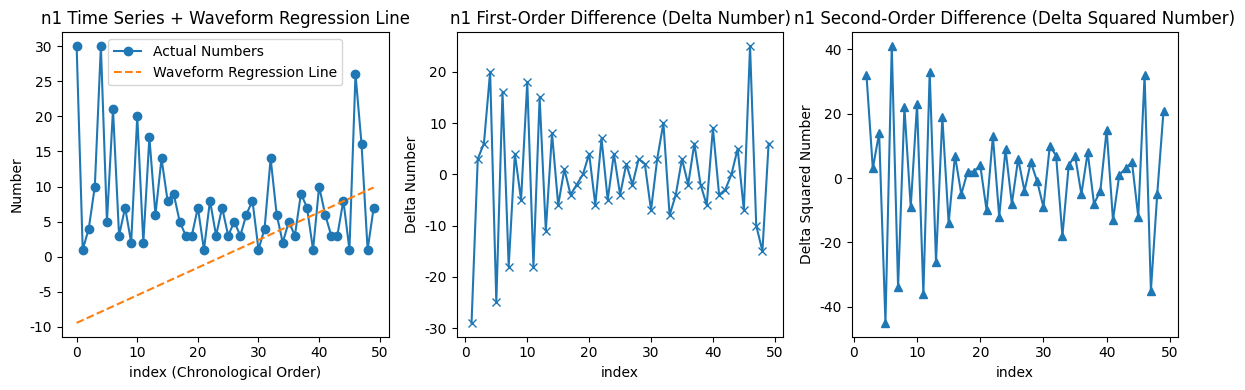


=== 파형 + 미분 하이브리드 롤링 백테스트 결과 ===
테스트 회차 수: 1151
평균 적중 개수: 0.7932232841007819


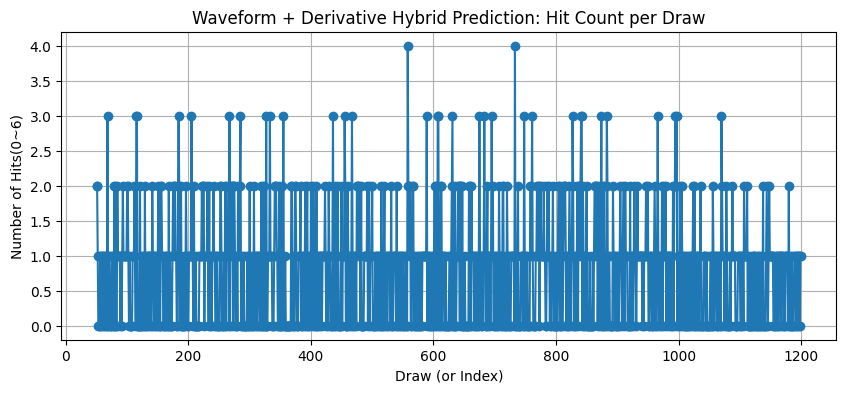

In [51]:
# ===== 파형 + 미분(차분) 하이브리드 기반 로또 예측 예제 셀 =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------
# 0. 기본 설정
# --------------------------------------------------
NUM_RANGE = 45        # 1~45
NUM_MAIN = 6          # 메인 번호 개수
LOOKBACK = 50         # 최근 LOOKBACK 회차를 분석에 사용
WAVE_WINDOW = 10      # 파형(회귀) 계산에 사용할 최근 구간 수
D1_WINDOW = 5         # 1차 차분 평균에 사용할 구간 수
D2_WINDOW = 5         # 2차 차분 평균에 사용할 구간 수
ALPHA_WAVE = 0.5      # 파형 vs 미분 가중치 (0.0~1.0, 0.5면 반반)

df_hybrid = df.copy()

# 회차 기준 정렬 (오래된 회차 -> 최신 회차)
if "회차" in df_hybrid.columns:
    df_hybrid = df_hybrid.sort_values("회차")
else:
    df_hybrid = df_hybrid.sort_index()

# 메인 번호 컬럼 (필요시 여기만 수정)
main_cols = [f"n{i}" for i in range(1, NUM_MAIN + 1)]
for c in main_cols:
    if c not in df_hybrid.columns:
        raise ValueError(f"컬럼 '{c}' 를 찾을 수 없습니다. df 컬럼: {df_hybrid.columns.tolist()}")

print("사용하는 메인 번호 컬럼:", main_cols)
print("총 회차 수:", len(df_hybrid))


# --------------------------------------------------
# 1. 파형 + 미분 하이브리드 예측 함수
# --------------------------------------------------
def wave_derivative_hybrid_predict_next(
    df_in,
    main_cols,
    lookback=LOOKBACK,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    wave_window=WAVE_WINDOW,
    d1_window=D1_WINDOW,
    d2_window=D2_WINDOW,
    alpha_wave=ALPHA_WAVE,
):
    """
    df_in      : 회차 정렬이 완료된 DataFrame
    main_cols  : 메인 번호 컬럼 리스트 (예: ['n1',...'n6'])
    lookback   : 분석에 사용할 최근 회차 수
    wave_window: 파형(회귀) 계산에 사용할 최근 구간 수
    d1_window  : 1차 차분 평균에 사용할 구간 수
    d2_window  : 2차 차분 평균에 사용할 구간 수
    alpha_wave : 하이브리드 가중치 (wave 비중), 0~1 사이
    """
    df_local = df_in.copy()

    # 최근 lookback 개만 사용 (데이터 부족하면 전체 사용)
    if len(df_local) < lookback:
        lookback = len(df_local)
    df_recent = df_local.iloc[-lookback:]

    pred_numbers = []
    debug_info = []

    for pos, col in enumerate(main_cols, start=1):
        series = df_recent[col].astype(int).values

        if len(series) == 0:
            raise ValueError("series 길이가 0입니다. 데이터가 부족합니다.")

        last_x = float(series[-1])

        # ------------------------------
        # (1) 파형 기반 예측 (선형 회귀)
        # ------------------------------
        if len(series) >= 2:
            x_idx = np.arange(len(series))
            # 최근 wave_window 개만 사용
            if len(series) > wave_window:
                x_w = x_idx[-wave_window:]
                y_w = series[-wave_window:]
            else:
                x_w = x_idx
                y_w = series

            # 선형 회귀 (1차 다항식)
            try:
                slope, intercept = np.polyfit(x_w, y_w, 1)
            except np.linalg.LinAlgError:
                slope, intercept = 0.0, float(last_x)

            wave_next = last_x + slope   # 한 스텝 앞 예측
        else:
            # 데이터가 1개 이하이면, 그냥 마지막 값 유지
            wave_next = last_x

        # ------------------------------
        # (2) 미분(1차+2차 차분) 기반 예측
        # ------------------------------
        if len(series) >= 3:
            d1 = np.diff(series)          # 1차 차분
            d2 = np.diff(d1) if len(d1) > 1 else np.array([])  # 2차 차분

            # 최근 d1_window 개 1차 차분 평균
            w1 = min(d1_window, len(d1))
            mean_d1 = float(np.mean(d1[-w1:])) if w1 > 0 else 0.0

            # 최근 d2_window 개 2차 차분 평균
            if len(d2) > 0:
                w2 = min(d2_window, len(d2))
                mean_d2 = float(np.mean(d2[-w2:])) if w2 > 0 else 0.0
            else:
                mean_d2 = 0.0

            last_d1 = float(d1[-1]) if len(d1) > 0 else 0.0
            d1_next = last_d1 + mean_d2
            deriv_next = last_x + d1_next
        else:
            # 데이터가 부족하면 1차/2차 차분 의미가 약하므로, 마지막 값 유지
            deriv_next = last_x

        # ------------------------------
        # (3) 하이브리드 결합
        # ------------------------------
        alpha_wave = float(alpha_wave)
        alpha_wave = max(0.0, min(1.0, alpha_wave))  # 0~1로 클램프
        alpha_deriv = 1.0 - alpha_wave

        combined_raw = alpha_wave * wave_next + alpha_deriv * deriv_next

        # 반올림 + 1~num_range 범위로 클램프
        combined_round = int(np.rint(combined_raw))
        combined_round = max(1, min(num_range, combined_round))

        pred_numbers.append(combined_round)

        debug_info.append({
            "position": pos,
            "col": col,
            "series": series,
            "last_x": last_x,
            "wave_next_raw": wave_next,
            "deriv_next_raw": deriv_next,
            "combined_raw": combined_raw,
            "combined_clamped": combined_round,
        })

    # ------------------------------
    # (4) 중복 제거 및 보정
    # ------------------------------
    unique_nums = []
    used = set()
    for n in pred_numbers:
        if n not in used:
            unique_nums.append(n)
            used.add(n)
        else:
            # 겹치면 주변 숫자 중 비어 있는 숫자를 탐색
            found = False
            for offset in range(1, num_range):
                for candidate in (n - offset, n + offset):
                    if 1 <= candidate <= num_range and candidate not in used:
                        unique_nums.append(candidate)
                        used.add(candidate)
                        found = True
                        break
                if found:
                    break
            if not found:
                # 모든 숫자가 사용된 극단적 상황 → 남는 아무 숫자나
                for candidate in range(1, num_range + 1):
                    if candidate not in used:
                        unique_nums.append(candidate)
                        used.add(candidate)
                        break

    # 최종 num_select개만 사용 (정렬)
    final_pred = sorted(unique_nums[:num_select])
    return final_pred, debug_info


# --------------------------------------------------
# 2. 다음 회차 예측 실행
# --------------------------------------------------
hybrid_pred, hybrid_debug = wave_derivative_hybrid_predict_next(
    df_hybrid,
    main_cols=main_cols,
    lookback=LOOKBACK,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    wave_window=WAVE_WINDOW,
    d1_window=D1_WINDOW,
    d2_window=D2_WINDOW,
    alpha_wave=ALPHA_WAVE,
)

print("\n=== 파형 + 미분 하이브리드 기반 예측 결과 ===")
print("예측 번호 6개:", hybrid_pred)

# 디버그용으로 1구에 대한 상세 정보 출력
if hybrid_debug:
    info0 = hybrid_debug[0]
    print("\n[디버그] 1구(컬럼: {col})".format(col=info0["col"]))
    print("마지막 값 last_x        :", info0["last_x"])
    print("wave_next_raw (파형)    :", info0["wave_next_raw"])
    print("deriv_next_raw (미분)   :", info0["deriv_next_raw"])
    print("combined_raw            :", info0["combined_raw"])
    print("combined_clamped (최종) :", info0["combined_clamped"])


# --------------------------------------------------
# 3. 예시: 1구에 대한 실제 파형 + 회귀선 + 미분 정보 시각화
# --------------------------------------------------
pos_example = 1
col_example = main_cols[pos_example - 1]

df_recent = df_hybrid.iloc[-LOOKBACK:]
series_ex = df_recent[col_example].astype(int).values
x_idx = np.arange(len(series_ex))

plt.figure(figsize=(12, 4))

# (a) 실제 시계열 + 회귀 직선
plt.subplot(1, 3, 1)
#plt.plot(x_idx, series_ex, marker="o", label="실제 번호")
plt.plot(x_idx, series_ex, marker="o", label="Actual Numbers")

if len(series_ex) >= 2:
    if len(series_ex) > WAVE_WINDOW:
        x_w = x_idx[-WAVE_WINDOW:]
        y_w = series_ex[-WAVE_WINDOW:]
    else:
        x_w = x_idx
        y_w = series_ex
    try:
        slope_ex, intercept_ex = np.polyfit(x_w, y_w, 1)
        reg_line = slope_ex * x_idx + intercept_ex
        #plt.plot(x_idx, reg_line, linestyle="--", label="파형 회귀선")
        plt.plot(x_idx, reg_line, linestyle="--", label="Waveform Regression Line")
    except np.linalg.LinAlgError:
        pass

#plt.title(f"{col_example} 시계열 + 파형 회귀선")
plt.title(f"{col_example} Time Series + Waveform Regression Line")
plt.xlabel("index (Chronological Order)")
plt.ylabel("Number")
plt.legend()

# (b) 1차 차분
plt.subplot(1, 3, 2)
d1_ex = np.diff(series_ex) if len(series_ex) > 1 else np.array([])
if len(d1_ex) > 0:
    plt.plot(range(1, len(series_ex)), d1_ex, marker="x")
    plt.title(f"{col_example} First-Order Difference (Delta Number)")
    plt.xlabel("index")
    plt.ylabel("Delta Number")
else:
    plt.text(0.5, 0.5, "Insufficient Data", ha="center", va="center")
    plt.title("First-Order Difference")

# (c) 2차 차분
plt.subplot(1, 3, 3)
d2_ex = np.diff(d1_ex) if len(d1_ex) > 1 else np.array([])
if len(d2_ex) > 0:
    plt.plot(range(2, len(series_ex)), d2_ex, marker="^")
    plt.title(f"{col_example} Second-Order Difference (Delta Squared Number)")
    plt.xlabel("index")
    plt.ylabel("Delta Squared Number")
else:
    plt.text(0.5, 0.5, "Insufficient Data", ha="center", va="center")
    plt.title("Second-Order Difference")

plt.tight_layout()
plt.show()


# --------------------------------------------------
# 4. 롤링 백테스트 (파형+미분 하이브리드)
# --------------------------------------------------
def wave_derivative_backtest(
    df_in,
    main_cols,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    lookback=LOOKBACK,
    wave_window=WAVE_WINDOW,
    d1_window=D1_WINDOW,
    d2_window=D2_WINDOW,
    alpha_wave=ALPHA_WAVE,
):
    """
    각 회차를 테스트 대상으로 삼아,
    - 그 회차 직전까지의 데이터로 wave_derivative_hybrid_predict_next 실행
    - 실제 당첨번호와 교집합 크기(hit 수)를 기록
    """
    df_local = df_in.copy()
    if "회차" in df_local.columns:
        df_local = df_local.sort_values("회차")
    else:
        df_local = df_local.sort_index()

    hits = []
    rounds = []

    for idx in range(lookback, len(df_local)):
        df_train = df_local.iloc[:idx]  # 이전까지 학습용

        pred, _ = wave_derivative_hybrid_predict_next(
            df_train,
            main_cols=main_cols,
            lookback=lookback,
            num_range=num_range,
            num_select=num_select,
            wave_window=wave_window,
            d1_window=d1_window,
            d2_window=d2_window,
            alpha_wave=alpha_wave,
        )

        row_actual = df_local.iloc[idx]
        actual_nums = [int(row_actual[c]) for c in main_cols]

        hit_count = len(set(pred) & set(actual_nums))
        hits.append(hit_count)

        if "회차" in df_local.columns:
            rounds.append(int(row_actual["회차"]))
        else:
            rounds.append(idx)

    return rounds, hits

rounds_h, hits_h = wave_derivative_backtest(
    df_hybrid,
    main_cols=main_cols,
    num_range=NUM_RANGE,
    num_select=NUM_MAIN,
    lookback=LOOKBACK,
    wave_window=WAVE_WINDOW,
    d1_window=D1_WINDOW,
    d2_window=D2_WINDOW,
    alpha_wave=ALPHA_WAVE,
)

if hits_h:
    print("\n=== 파형 + 미분 하이브리드 롤링 백테스트 결과 ===")
    print("테스트 회차 수:", len(hits_h))
    print("평균 적중 개수:", np.mean(hits_h))

    plt.figure(figsize=(10, 4))
    plt.plot(rounds_h, hits_h, marker="o")
    #plt.title("파형 + 미분 하이브리드 예측: 회차별 Hit 개수")
    #plt.xlabel("회차(또는 index)")
    #plt.ylabel("맞힌 개수(0~6)")
    plt.title("Waveform + Derivative Hybrid Prediction: Hit Count per Draw")
    plt.xlabel("Draw (or Index)")
    plt.ylabel("Number of Hits(0~6)")
    plt.grid(True)
    plt.show()
else:
    print("\n백테스트를 수행하기에 데이터가 충분하지 않습니다.")
